In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix


In [2]:
path = '/Users/guozhiqi-seven/Google Drive/NYU Master/Intro to DS/Airbnb Project/listings.csv'
df = pd.read_csv(path)
list(df.columns)  #all features for the dataframe

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [3]:
'''obviously useful features for our base-line model'''

useful_cols = ['accommodates',
               'bathrooms',
               'bedrooms',
               'beds',
               'number_of_reviews',
               'cancellation_policy',
               'reviews_per_month',
               'neighbourhood_cleansed',
               'neighbourhood_group_cleansed',
               'instant_bookable',
               'review_scores_rating',
               'room_type',
               'host_identity_verified',
               'price']

In [4]:
df = df[useful_cols].copy()
df.head(5) 

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,review_scores_rating,room_type,host_identity_verified,price
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,92.0,Private room,t,$65.00
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,92.0,Entire home/apt,t,$125.00
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,98.0,Entire home/apt,t,$79.00
3,4,3.0,3.0,3.0,0,strict,NaN,City Island,Bronx,f,NaN,Entire home/apt,f,$300.00
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,97.0,Private room,t,$59.00


In [5]:
'''convert price from object to float '''

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float) 

In [6]:
'''fill all NaN value in features by 0 (convert to 0 but do not drop NaN value instance)'''
df['reviews_per_month'] .fillna(0 , inplace = True)
df['review_scores_rating'] .fillna(0 , inplace = True)
df['bathrooms'] .fillna(0 , inplace = True)
df['bedrooms'] .fillna(0 , inplace = True)
df['beds'] .fillna(0 , inplace = True)

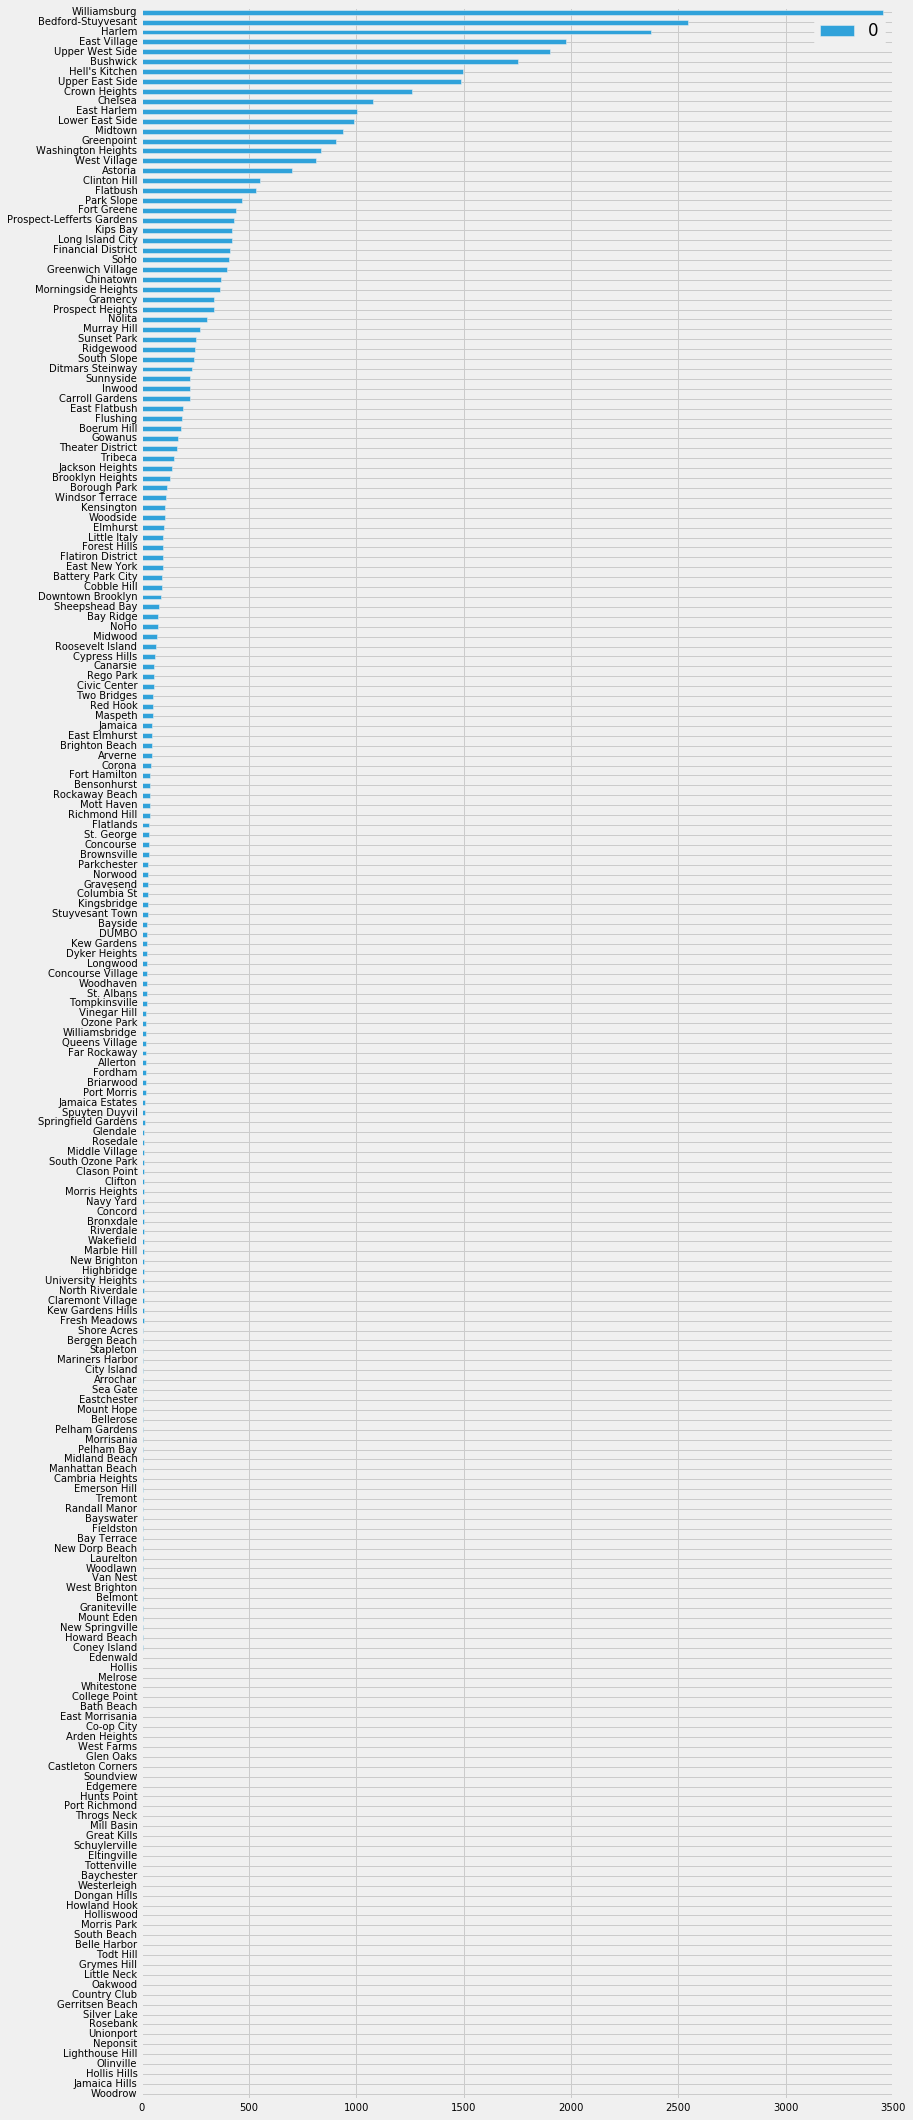

In [7]:
'''counts instances for different neighbourhood'''

from collections import Counter
plt.style.use('fivethirtyeight')

nb_counts = Counter(df['neighbourhood_cleansed'])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0) 
tdf.plot(kind='barh',figsize = (12, 35), fontsize=10)

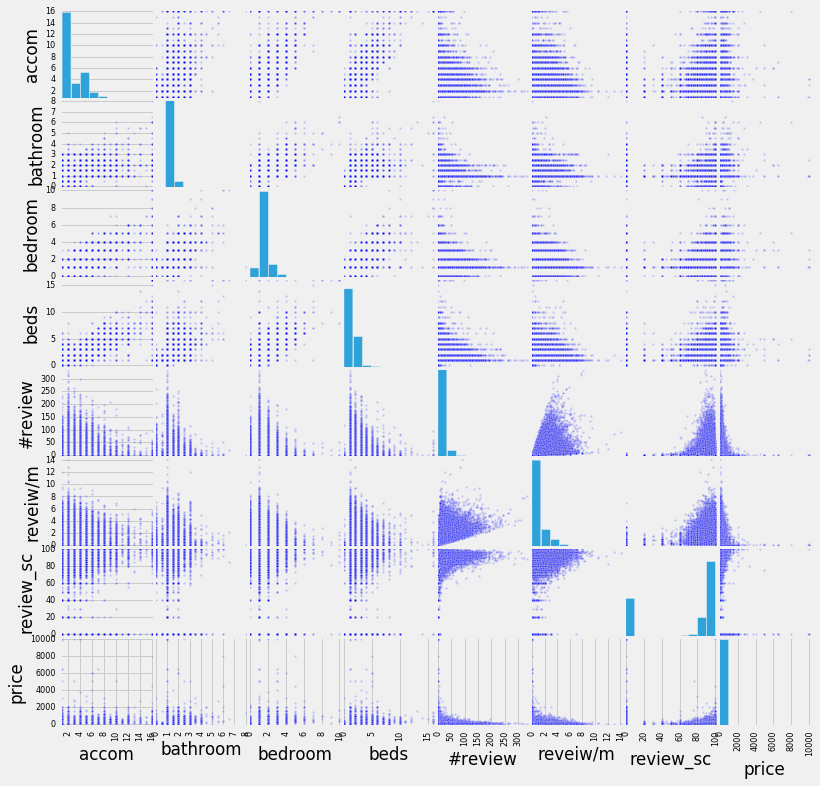

In [8]:
'''check whether there are any highly-correlated feature, if so we need to re-pick our selected features'''

scatter_cols = ['accommodates','bathrooms','bedrooms','beds','number_of_reviews',\
                'reviews_per_month','review_scores_rating','price']
col_names    = ['accom','bathroom','bedroom','beds','#review','reveiw/m','review_sc','price']

df_scatter = df[scatter_cols] 
df_scatter.columns = col_names #change name of cols for purpose of clear plotting
axs = scatter_matrix(df_scatter, alpha=0.2, diagonal='hist',figsize=(12,12))

comment:
* 这儿有些我看是correlated的 =。= 那天你们说features之前最好不要correlated我not sure是什么意思所以这儿啊我暂时这么放着了
* 这儿的话像bedroom & beds & bathrooms 这样的features 就蛮related的

In [9]:
'''Binning the listing price to 5 price interval, each price interval has approximately same nubmer of instance'''

labels = ["[$10-65]","[$65-95]","[$95-130]","[$130-197]","[$197-10000]"]
df['price_binning'] = pd.qcut(df['price'], 5 ,labels = labels )
print('How the binning prices distributed:\n',df['price_binning'].value_counts())
df.head(5) 

How the binning prices distributed:
 [$10-65]        8047
[$65-95]        7851
[$197-10000]    7757
[$130-197]      7667
[$95-130]       7488
Name: price_binning, dtype: int64


,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy,reviews_per_month,neighbourhood_cleansed,neighbourhood_group_cleansed,instant_bookable,review_scores_rating,room_type,host_identity_verified,price,price_binning
0,2,1.0,1.0,1.0,15,moderate,0.75,City Island,Bronx,f,92.0,Private room,t,65.0,[$10-65]
1,3,1.0,1.0,1.0,10,flexible,0.82,City Island,Bronx,f,92.0,Entire home/apt,t,125.0,[$95-130]
2,4,1.0,1.0,2.0,16,flexible,4.57,City Island,Bronx,t,98.0,Entire home/apt,t,79.0,[$65-95]
3,4,3.0,3.0,3.0,0,strict,0.00,City Island,Bronx,f,0.0,Entire home/apt,f,300.0,[$197-10000]
4,4,1.0,1.0,1.0,59,moderate,4.36,City Island,Bronx,t,97.0,Private room,t,59.0,[$10-65]


In [10]:
'''features which need to be convert to dummy variables'''

for i in useful_cols:
    if df[i].dtypes == object:
        print(i,':',df[i].dtypes)

cancellation_policy : object
neighbourhood_cleansed : object
neighbourhood_group_cleansed : object
instant_bookable : object
room_type : object
host_identity_verified : object


In [11]:
'''convert all categorical features to dummy variables'''

cp_dummy = pd.get_dummies(df['cancellation_policy'])                            #cancellation_policy
nc_dummy = pd.get_dummies(df['neighbourhood_cleansed'])                         #neighbourhood_cleansed
ngc_dummy = pd.get_dummies(df['neighbourhood_group_cleansed'])                  #neighbourhood_group_cleansed
ry_dummy = pd.get_dummies(df['room_type'])                                      #room_type
hiv_dummy = pd.get_dummies(df['host_identity_verified'],                        #host_identity_verified(true/false value) 
                           prefix='host_identity_verified')                     
ib_dummy = pd.get_dummies(df['instant_bookable'],prefix ='instant_bookable')    #instant_bookable(true/false value)

In [12]:
'''drop all original categorical features and concatenate new dummy matrix'''

drop_cols = ['cancellation_policy','neighbourhood_cleansed','neighbourhood_group_cleansed',
             'room_type','host_identity_verified','instant_bookable']
df = df.drop(drop_cols,axis = 1)

In [13]:
'''Concatenate the dataset with all new dummy matrix'''

frames = [df,cp_dummy.astype(int),nc_dummy.astype(int),ngc_dummy.astype(int),
          ry_dummy.astype(int),hiv_dummy.astype(int),ib_dummy.astype(int) ]
alldata = pd.concat(frames,axis=1)
alldata.head(5) 

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,reviews_per_month,review_scores_rating,price,price_binning,flexible,...,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
0,2,1.0,1.0,1.0,15,0.75,92.0,65.0,[$10-65],0,...,0,0,0,0,1,0,0,1,1,0
1,3,1.0,1.0,1.0,10,0.82,92.0,125.0,[$95-130],1,...,0,0,0,1,0,0,0,1,1,0
2,4,1.0,1.0,2.0,16,4.57,98.0,79.0,[$65-95],1,...,0,0,0,1,0,0,0,1,0,1
3,4,3.0,3.0,3.0,0,0.00,0.0,300.0,[$197-10000],0,...,0,0,0,1,0,0,1,0,1,0
4,4,1.0,1.0,1.0,59,4.36,97.0,59.0,[$10-65],0,...,0,0,0,0,1,0,0,1,0,1


In [14]:
'''split train and test by 80/20'''

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['price'],axis=1),\
                                                    df['price'], test_size=0.2, random_state=0)